# 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。  
データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。  
目的変数も同様にyに格納してください。

In [111]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data,columns = ["sepal_length","sepal_width","petal_length","petal_width"])
y = pd.DataFrame(iris.target,columns  = ["Species"])
print(X,y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6             4.6          3.4           1.4          0.3
7             5.0          3.4           1.5          0.2
8             4.4          2.9           1.4          0.2
9             4.9          3.1           1.5          0.1
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
16            

# 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [112]:
df = pd.concat([X,y],axis=1)
print(df)

     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
5             5.4          3.9           1.7          0.4        0
6             4.6          3.4           1.4          0.3        0
7             5.0          3.4           1.5          0.2        0
8             4.4          2.9           1.4          0.2        0
9             4.9          3.1           1.5          0.1        0
10            5.4          3.7           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
12            4.8          3.0           1.4          0.1        0
13            4.3          3.0           1.1          0.1     

# 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


・先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）  
・ラベルごとのサンプル数の合計を出力する。  
・特徴量に欠損値があるかを確認する。  
・特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [113]:
"""
P110.2
loc属性:明示的なインデックスを使ったインデックスおよびスライスが可能になる
iloc属性:間接的なPythonスタイルのインデックスを使ったインデックスとスライスを可能にする 
"""
print("先頭から４番目までのサンプル:")
df.iloc[:4,:]

先頭から４番目までのサンプル:


,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [114]:
#マスクを利用
print("ラベル０のサンプル数：{}".format(len(df[df.Species == 0])))
print("ラベル1のサンプル数：{}".format(len(df[df.Species == 1])))
print("ラベル2のサンプル数：{}".format(len(df[df.Species == 2])))

ラベル０のサンプル数：50
ラベル1のサンプル数：50
ラベル2のサンプル数：50


In [115]:
print("dfの欠損値の合計は{}個".format(df.isnull().sum().sum()))

dfの欠損値の合計は0個


In [199]:
word_list = ["mean","std","25%","50%","75%"]
df_describe = df.describe()
print("mean:平均　std:標準偏差 25%:第一四分位数　５０％:第二四分位数　７５％:第三四分位数")
df_describe.loc[word_list]

mean:平均　std:標準偏差 25%:第一四分位数　５０％:第二四分位数　７５％:第三四分位数


,sepal_length,sepal_width,petal_length,petal_width,Species
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000


# 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。



Iris属 (アヤメ属) はアヤメ科に含まれる属のうちのひとつで，世界の温帯に150種が知られている (アヤメ属 - Wikipedia)．
irisデータセットに含まれるIris setosa，Iris versicolor，Iris virginicaは，このアヤメ属に含まれる植物のうちの3種.

米国の植物学者Edgar Andersonによって1936年に発表された研究のなかで，もともとの計測が行なわれている (Anderson, 1936)．
数値データが報告されたのは，英国の統計学者Ronald Aylmer Fisherの1936年の論文である(Fisher, 1936 )．　　　　 

アヤメ属の3種 (Iris setosa，Iris versicolor，Iris virginica) の種分化について,形態，遺伝，生態，進化の考察を行なった大論文である．　　
論旨をごく簡単にまとめると，以下の通り．　　

setosaに比べて，versicolorとvirginicaの形態はよく似ている

setosaとの違いは，virsinicaのほうが大きく，versicolorで小さい　　　　

versicolorは，setosaとvirginicaの雑種に由来しているかもしれない　　　　

https://tsutatsutatsuta.hatenadiary.org/entry/20121206/1354737461  
より引用


# 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


・sepal_widthの列を３つの異なる方法で抽出する

・50番目から99番目までのデータを抽出する

・petal_lengthの列の50番目から99番目までのデータを抽出する

・petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。



In [117]:
#sepal_widthの列を３つの異なる方法で抽出
sepal_width1 = df.sepal_width
sepal_width2 = df["sepal_width"]
sepal_width3 = df.iloc[:,1:]
#print(sepal_width1)
#print(sepal_width2)
#print(sepal_width3)

#50番目から99番目までのデータを抽出する
sepal_width_50_99 = df.iloc[50:100,:]
#print(sepal_width_50_99)

#petal_lengthの列の50番目から99番目までのデータを抽出する
petal_length1 = df.petal_length[50:100]
#print(petal_length1)

petal_width_02 = df.petal_width[df.petal_width == 0.2]
#print(petal_width_02)

### .locと.ilocの違い
loc属性:明示的なインデックスを使ったインデックスおよびスライスが可能になる。また、data[1:3]という指定をすると2番目から４番目までのデータにアクセスする。  
iloc属性:間接的なPythonスタイルのインデックスを使ったインデックスとスライスを可能にする。また、data[1:3]という指定をすると2番目から3番目までのデータにアクセスする。

# 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。  
ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）  
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する  
特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する  
箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

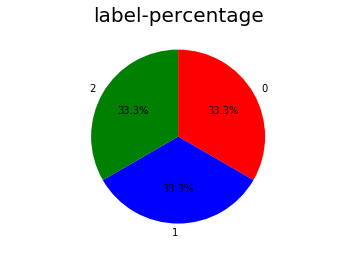

In [200]:
#円グラフ
import matplotlib.pyplot as plt
import numpy as np

label_0 = df[df.Species == 0]
label_1 = df[df.Species == 1]
label_2 = df[df.Species == 2]
label = [0,1,2]

plt.title("label-percentage",size=20)
plt.axis('equal')
colors = ["red","blue","green"]
plt.pie([len(label_0),len(label_1),len(label_2)],labels = label,startangle=90,counterclock=False,colors = colors,autopct="%1.1f%%")
plt.show()

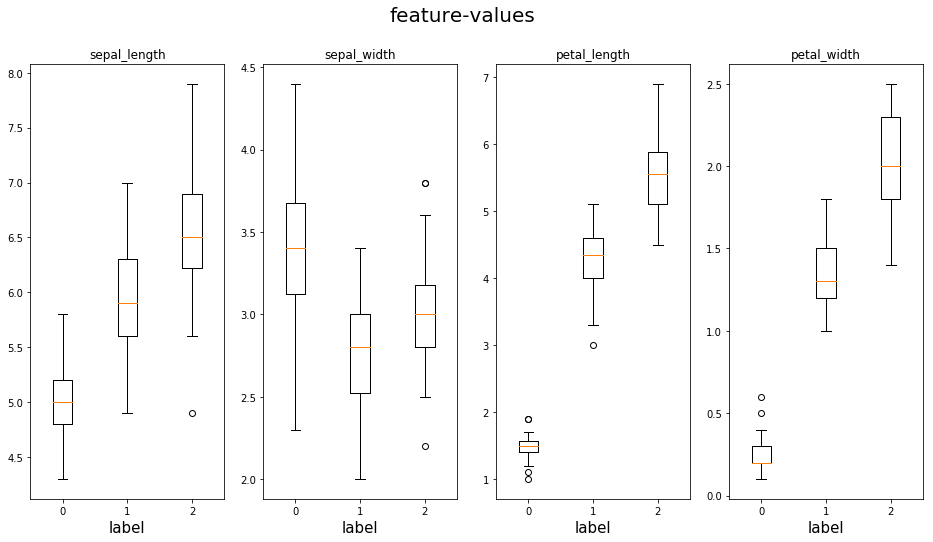

In [196]:
#箱ひげ図
%matplotlib inline
fig,ax = plt.subplots(1,4,figsize = (16,8))
fig.suptitle("feature-values",size = 20)

name = df.keys()

for i in range(4):
    ax[i].boxplot([label_0[name[i]].T,label_1[name[i]].T,label_2[name[i]].T],labels = label)
    ax[i].set_title(name[i])
    ax[i].set_xlabel ("label",fontsize = 15)
    
plt.show()

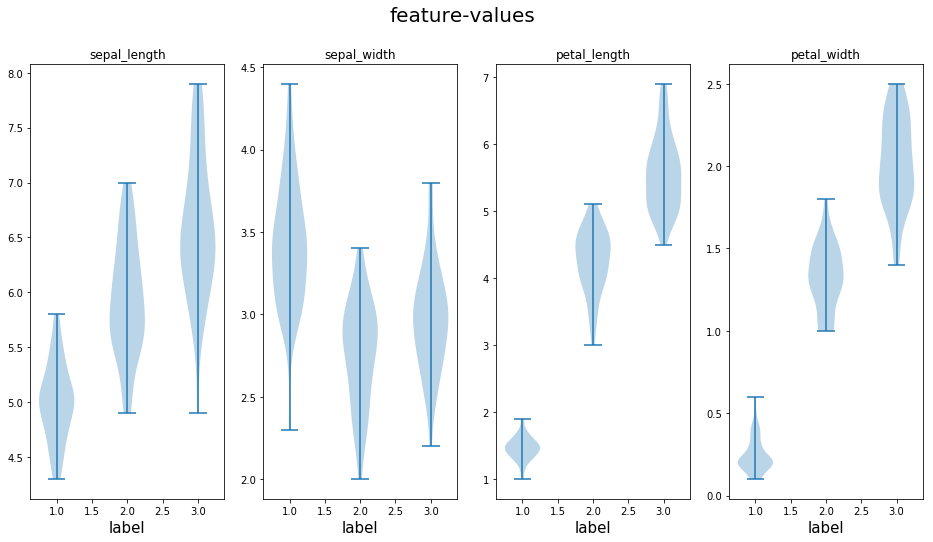

In [197]:
#バイオリン図
%matplotlib inline
fig,ax = plt.subplots(1,4,figsize = (16,8))
fig.suptitle("feature-values",size = 20)

name = df.keys()

for i in range(4):
    ax[i].violinplot([label_0[name[i]].T,label_1[name[i]].T,label_2[name[i]].T])#,positions = label)
    ax[i].set_title(name[i])
    ax[i].set_xlabel ("label",fontsize = 15)
    
plt.show()

### 箱ひげ図とバイオリン図の違い,利点(matplotlibの関数をデフォルト設定で利用した場合）

箱ひげ図：四分位数、最大最小値がわかる。分布のピークが二つある場合など、細かい分布まではわからない。

バイオリン図:最大最小値はわかるが四分位数がわからない。複数のピークとその大きさなど、細かい分布がひと目でわかる。